In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
pd.set_option('max_columns',None)

# 1. DESCRIPCIÓN DEL DATASET

## 1.1 Origen de los datos:
* Los datos fueron extraidos de kaggle.com, disponibles en el siguiente enlace: [https://www.kaggle.com/fedesoriano/stroke-prediction-dataset]

## 1.2 Contexto:
* Los certificados de depósito a término definido (CDT) son una importante fuente de ingresos para un banco. Estos consisten en una inversión en efectivo que se mantiene en una institución financiera. El dinero se invierte a un tipo de interés acordado durante un periodo de tiempo fijo. Un banco tiene varios medios de difusión para vender este tipo de instrumento financiero a sus clientes, como el marketing por correo electrónico, los anuncios, el marketing telefónico y el marketing digital.

* Las campañas de marketing telefónico siguen siendo una de las formas más eficaces de llegar al mercado objetivo. Sin embargo, requieren una gran inversión, ya que generalmente se terceriza el proceso de contacto, mediante grandes centros de llamadas para ejecutar las campañas. Por lo tanto, es crucial identificar de antemano a los clientes con más probabilidades de conversión para poder dirigirse específicamente a ellos mediante una llamada.

* Los datos están relacionados con las campañas de marketing directo (llamadas telefónicas) de una entidad bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente aceptará adquirir un CDT o no.

## 1.3 Contenido: 
* Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaban en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para dterminar si el producto (CDT) sería adquirido o no por el cliente. 

* El conjunto de datos está compuesto por dos subconjuntos:
    * Conjunto de entrenamiento (train.csv).
    * Conjunto de prueba (test.csv).

| Variable  | Significado                                                                                                                                                | Tipo variable | Valores                                                                                                                                            |
|-----------|------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| age       | edad del cliente contactado                                                                                                                                | Numérico      |                                                                                                                                                    |
| job       | tipo de trabajo del cliente                                                                                                                                | Categórico    | "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services" |
| marital   | Estado civíl del cliente                                                                                                                                   | Categórico    | "married","divorced","single"; note: "divorced" means divorced or widowed                                                                          |
| education | Nivel educativo del cliente                                                                                                                                | Categórico    | "unknown","secondary","primary","tertiary"                                                                                                         |
| default   | Flag si el cliente tiene crédito en mora                                                                                                                   | Binario       | "yes", "no"                                                                                                                                        |
| balance   | Saldo promedio anual en la cuenta (euros)                                                                                                                  | Numérico      |                                                                                                                                                    |
| Loan      | Flag si el cliente tiene algún prestamo                                                                                                                    | Binario       | "yes", "no"                                                                                                                                        |
| housing   | Flag si el cliente tiene crédito de vivienda                                                                                                               | Binario       | "yes", "no"                                                                                                                                        |
| contact   | Medio de contacto                                                                                                                                          | Categórico    | "unknown","telephone","cellular"                                                                                                                   |
| day       | Día del mes en que recibió el último contacto                                                                                                              | Numérico      |                                                                                                                                                    |
| month     | Mes en el cual recibió el último contacto                                                                                                                  | Categórico    | "jan", "feb", "mar", …, "nov", "dec"                                                                                                               |
| duration  | Duración en segundos del último contacto                                                                                                                   | Numérico      |                                                                                                                                                    |
| campaing  | Número de contactos que recibió el cliente para esta campaña. Incluido el último contacto                                                                  | Numérico      |                                                                                                                                                    |
| pdays     | Número de días que han pasado desde la última vez que se contactó al cliente para otra campaña. -1 indica que el cliente no ha sido contactado previamente | Númerico      |                                                                                                                                                    |
| previous  | Número de contactos realizados al cliente para esta campaña                                                                                                | Númerico      |                                                                                                                                                    |
| poutcome  | Resultado de la última campaña                                                                                                                             | Categórico    | "unknown","other","failure","success"                                                                                                              |
| y         | Variable de respuesta sobre si el cliente acepta o no                                                                                                      | Binario       | "yes", "no"                                                                                                                                        |

    



## 1.4 Cantidad:
* train.csv: 45.211 filas y 18 columnas ordenadas por fecha (de mayo de 2008 a noviembre de 2010)
* test.csv: 4521 filas y 18 columnas con el 10% de los ejemplos (4521), seleccionados aleatoriamente de train.csv

## 1.5 Distribución:
Se mostrará la distribución de las variables del dataset

Se hace la lectura de los datos y se almacena en la variable 'banking'

In [2]:
banking = pd.read_csv("Banking/train.csv", sep=";") #Las columnas se encuentran separadas por ;

Se imprime el encabezado del dataset para tener un primer acercamiento a los datos

In [3]:
banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### - AGE

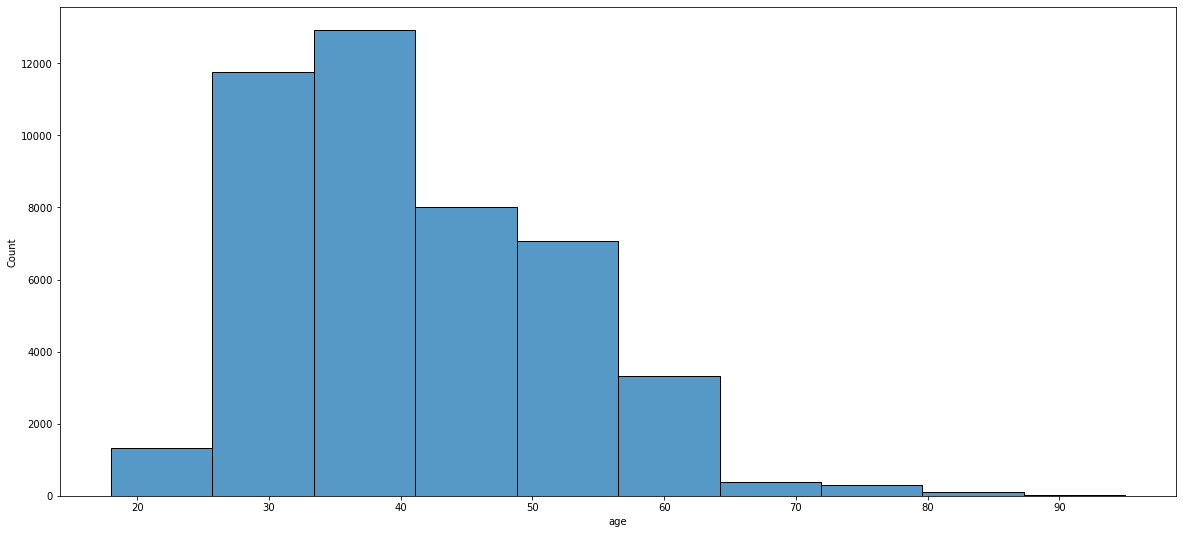

In [4]:
plt.figure(figsize = (20, 9))
sns.histplot(data = banking, x = 'age', bins = 10);

### - JOB

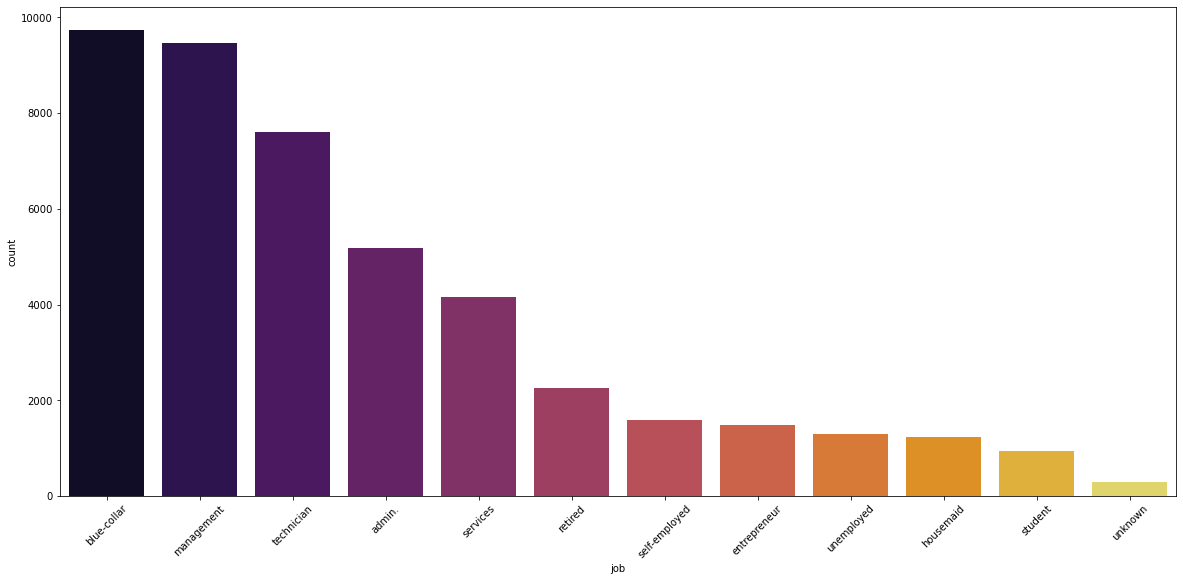

In [5]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'job', data = banking, order = banking['job'].value_counts().index, palette = 'inferno')
plt.xticks(rotation = 45);

### - MARITAL

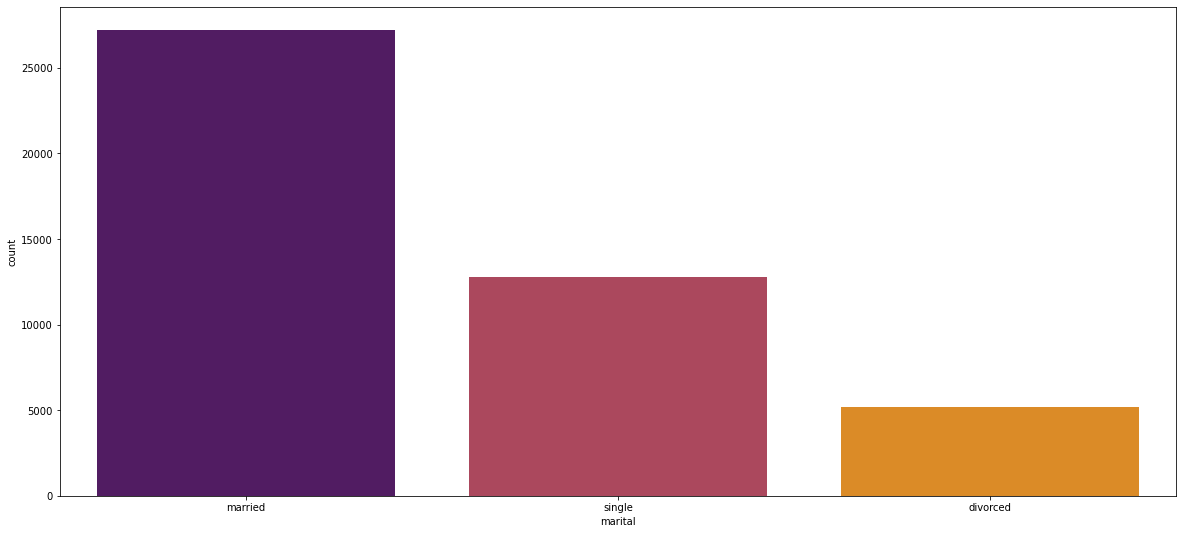

In [6]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'marital', data = banking, order = banking['marital'].value_counts().index, palette = 'inferno');

### - EDUCATION

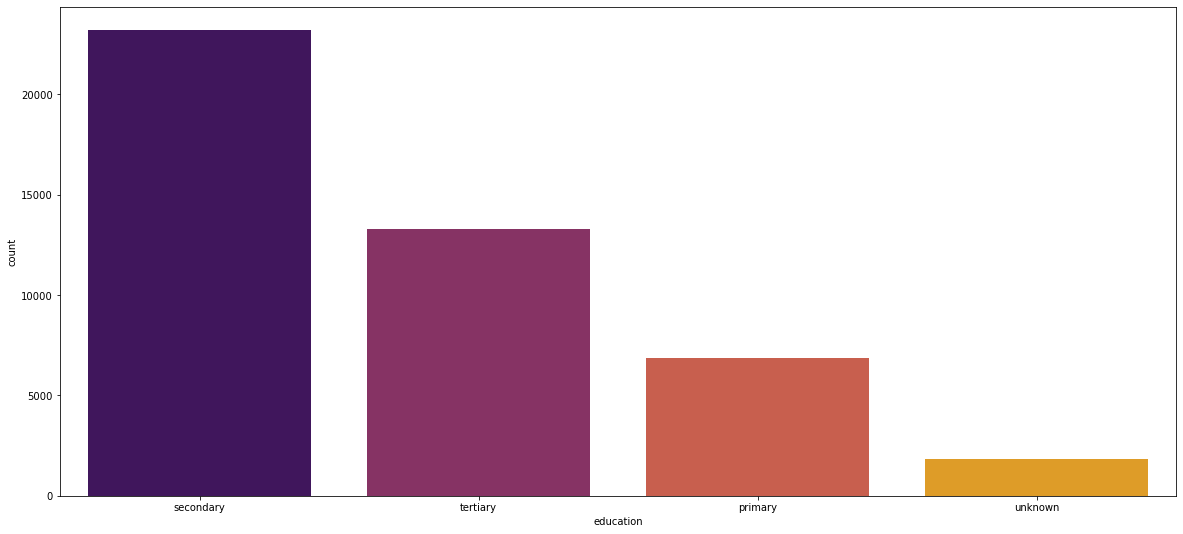

In [7]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'education', data = banking, order = banking['education'].value_counts().index, palette = 'inferno');

### - DEFAULT

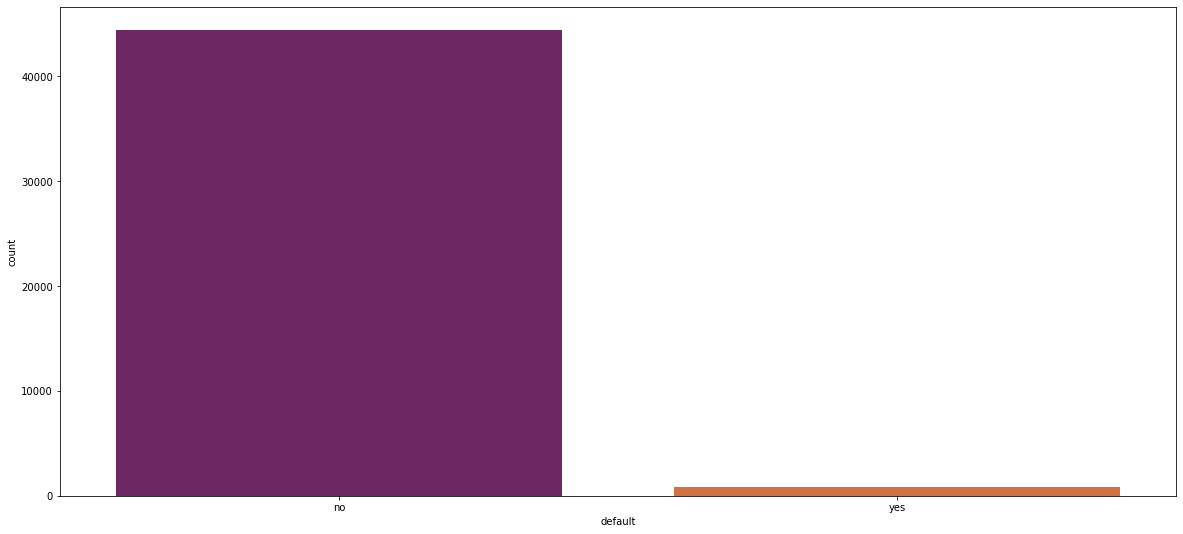

In [8]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'default', data = banking, order = banking['default'].value_counts().index, palette = 'inferno');

### - BALANCE

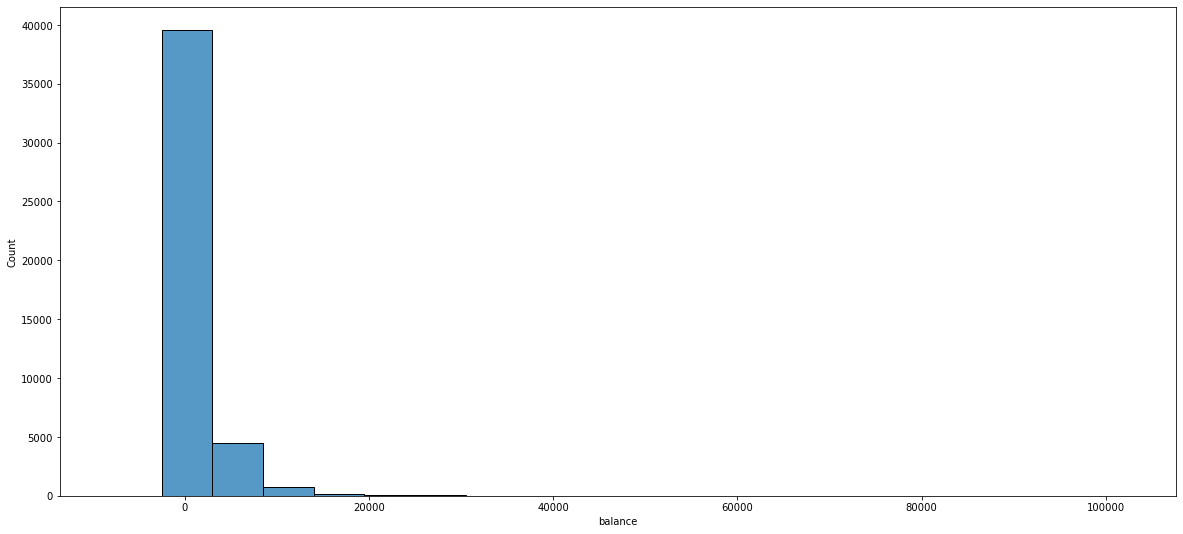

In [9]:
plt.figure(figsize = (20, 9))
sns.histplot(data = banking, x = 'balance', bins = 20);

### - HOUSING

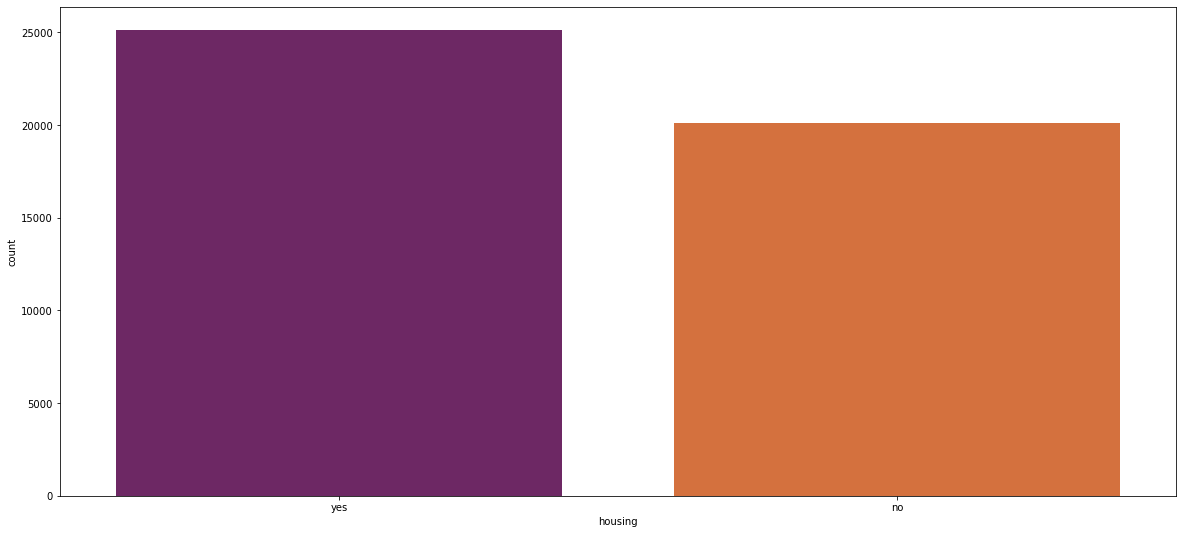

In [10]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'housing', data = banking, order = banking['housing'].value_counts().index, palette = 'inferno');

### - LOAN

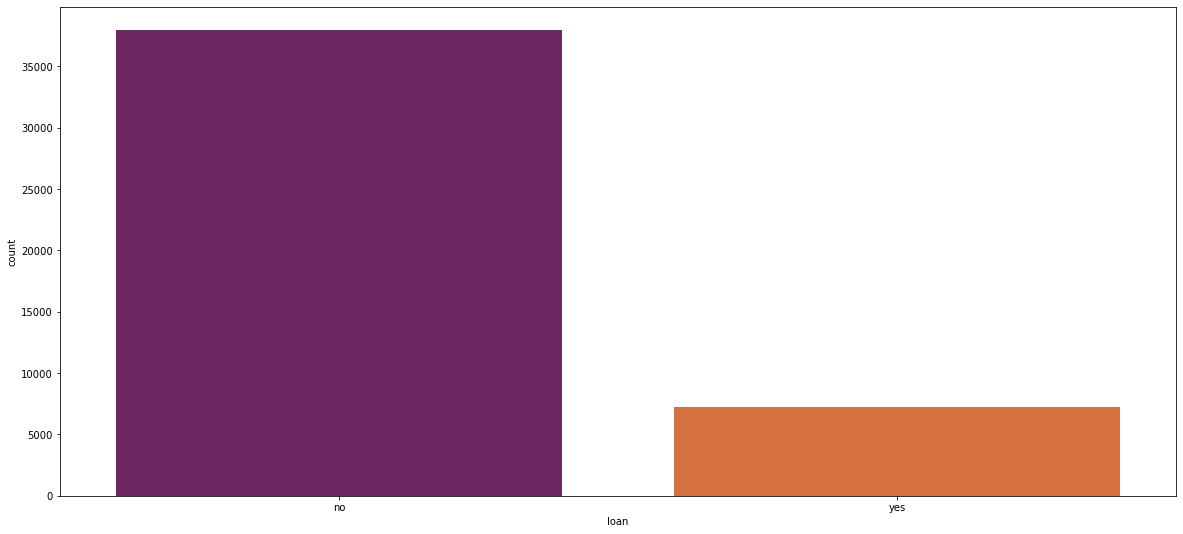

In [11]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'loan', data = banking, order = banking['loan'].value_counts().index, palette = 'inferno');

### - CONTACT

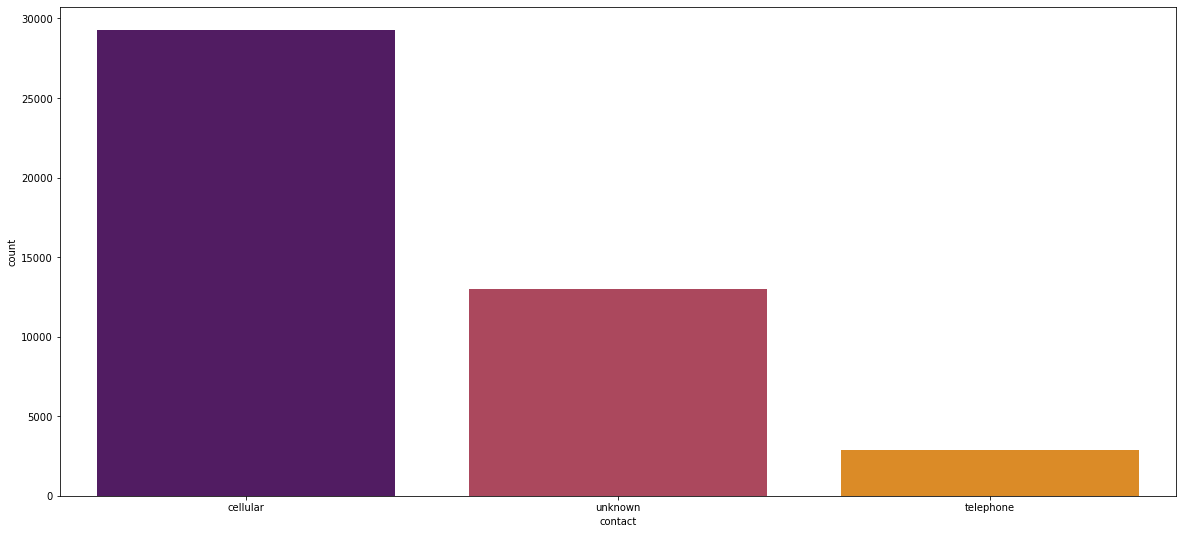

In [12]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'contact', data = banking, order = banking['contact'].value_counts().index, palette = 'inferno');

### - DAY

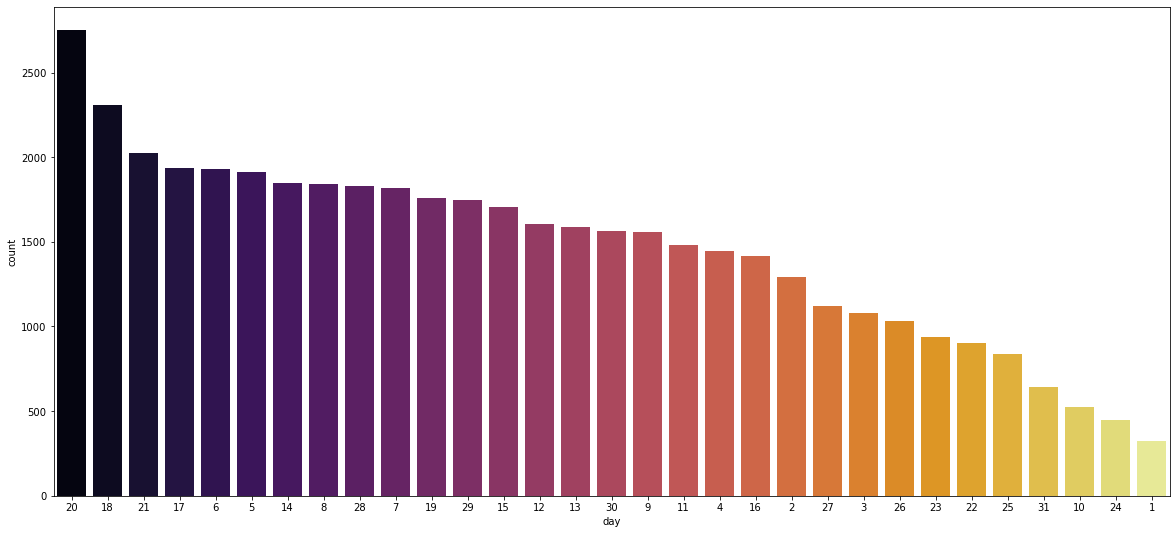

In [13]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'day', data = banking, order = banking['day'].value_counts().index, palette = 'inferno');

### - MONTH

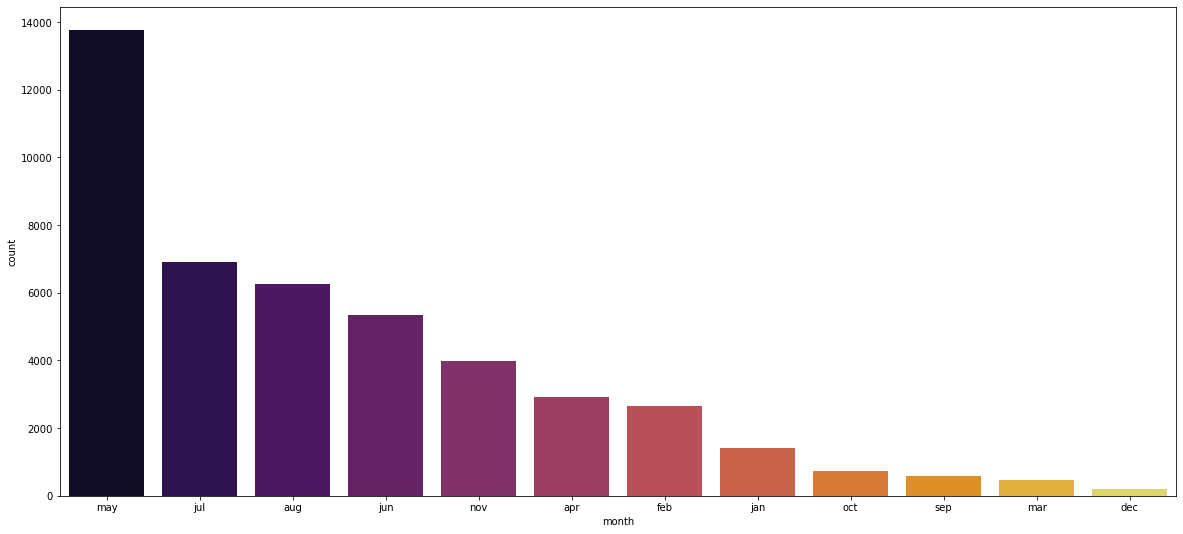

In [14]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'month', data = banking, order = banking['month'].value_counts().index, palette = 'inferno');

### - DURATION

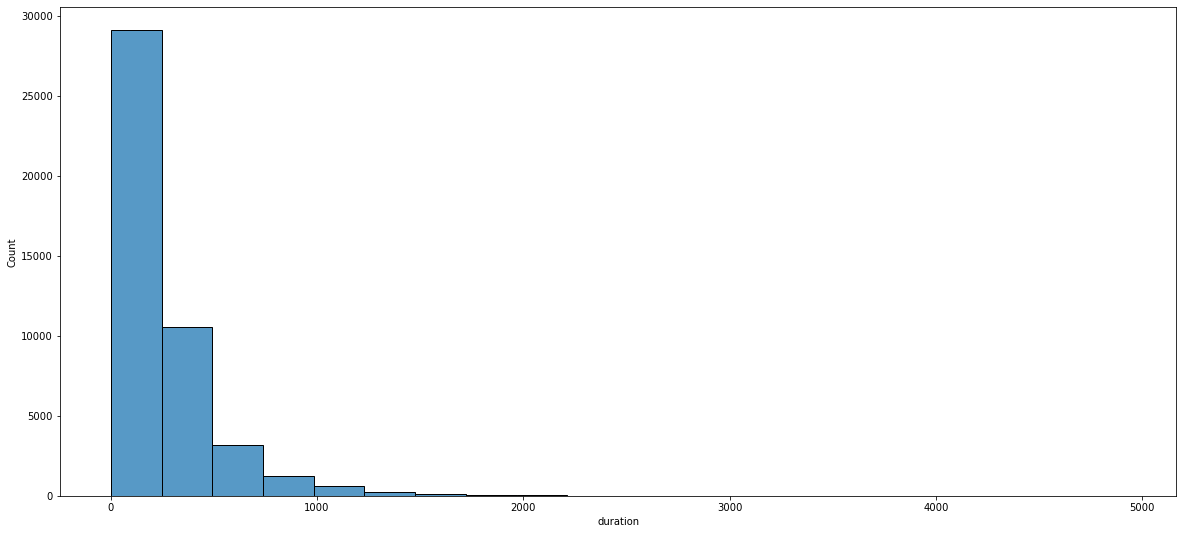

In [15]:
plt.figure(figsize = (20, 9))
sns.histplot(data = banking, x = 'duration', bins = 20);

### - CAMPAIGN

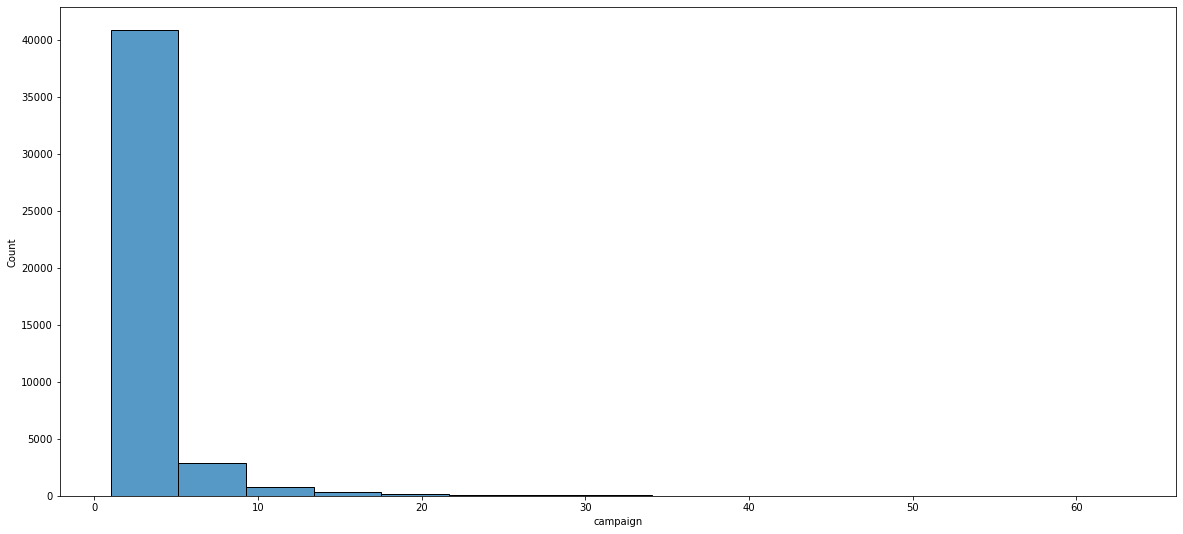

In [16]:
plt.figure(figsize = (20, 9))
sns.histplot(data = banking, x = 'campaign', bins = 15);

### - PDAYS

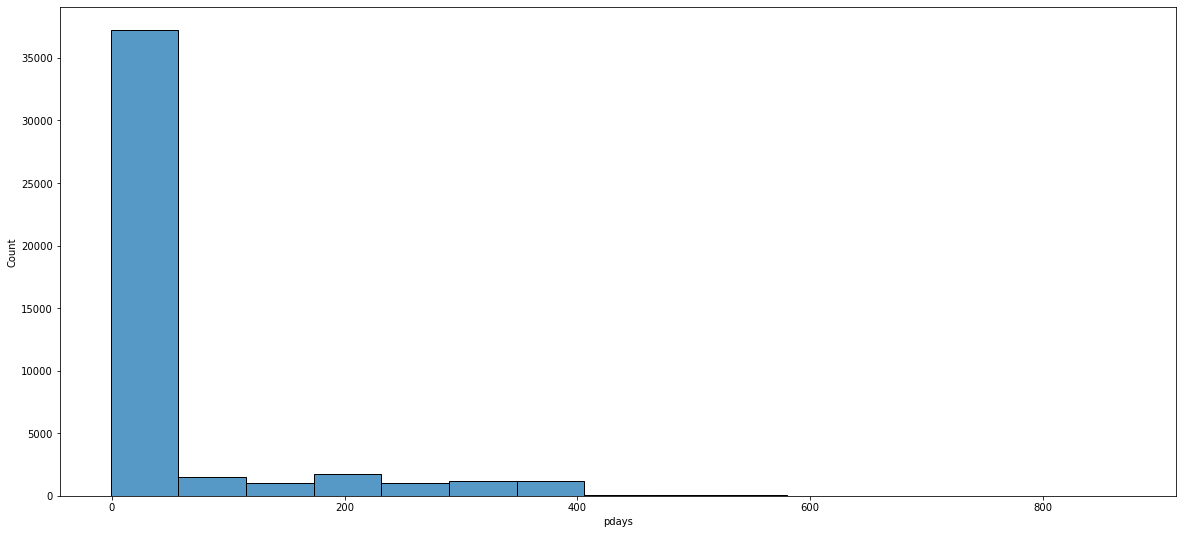

In [17]:
plt.figure(figsize = (20, 9))
sns.histplot(data = banking, x = 'pdays', bins = 15);

### - PREVIOUS

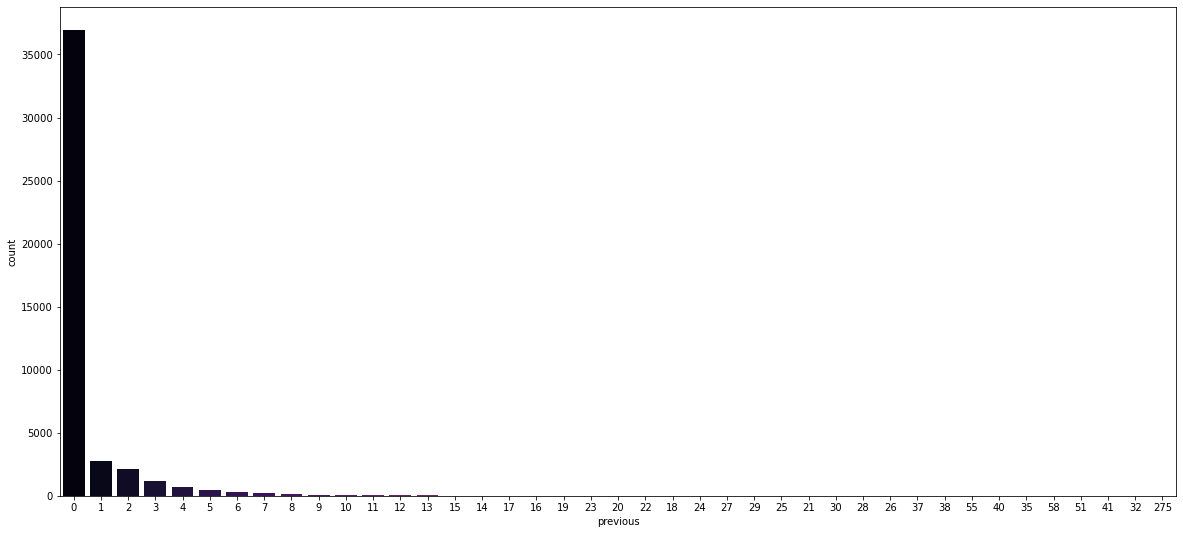

In [18]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'previous', data = banking, order = banking['previous'].value_counts().index, palette = 'inferno');

### - POUTCOME

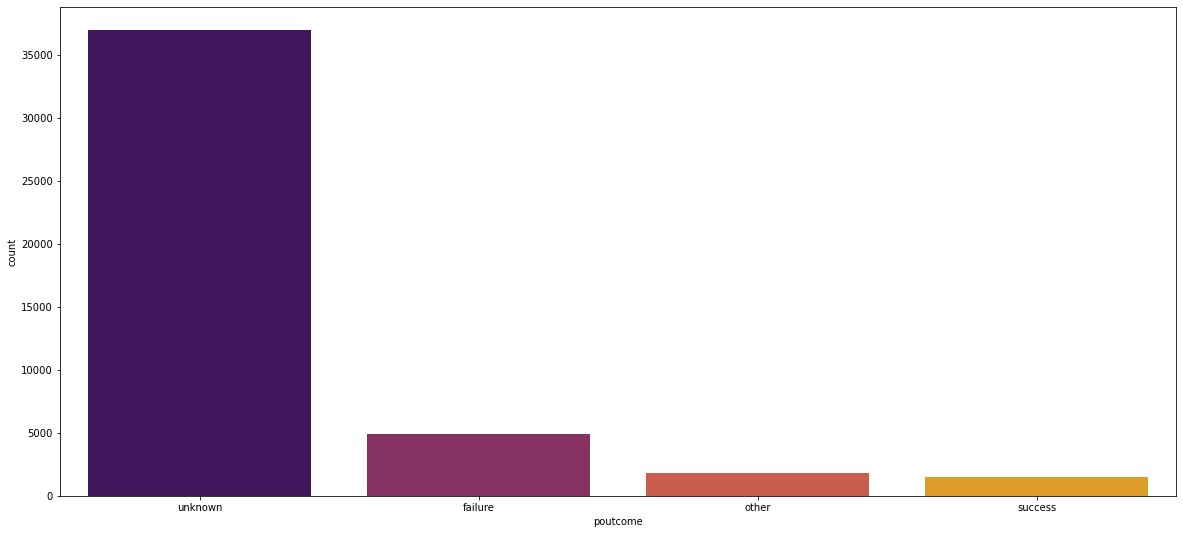

In [19]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'poutcome', data = banking, order = banking['poutcome'].value_counts().index, palette = 'inferno');

### - Y (OUTPUT VARIABLE)

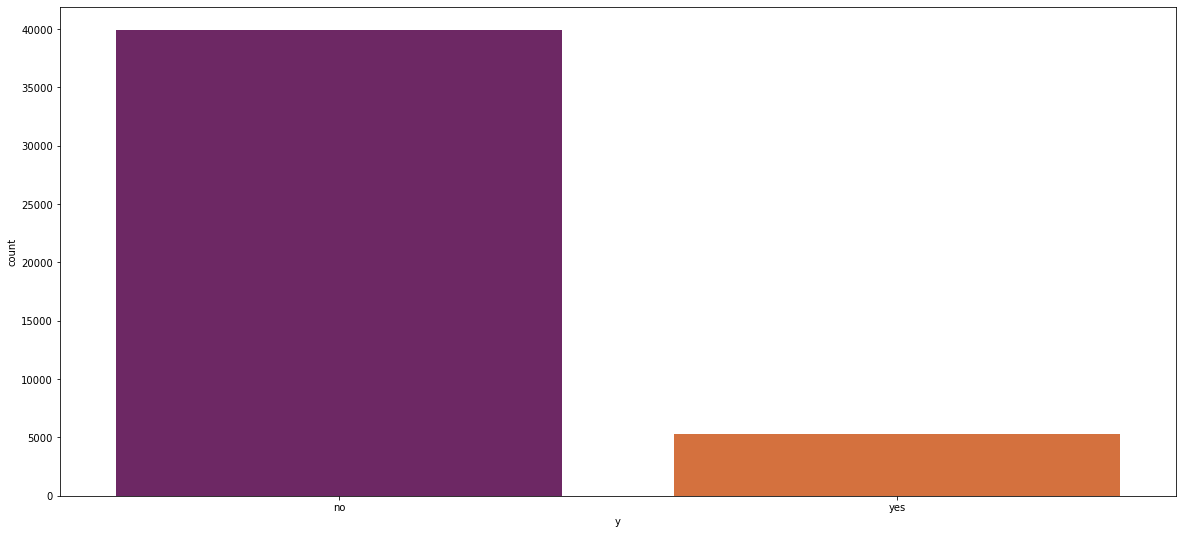

In [20]:
plt.figure(figsize = (20, 9))
sns.countplot(x = 'y', data = banking, order = banking['y'].value_counts().index, palette = 'inferno');

## 1.6 Limitantes y supuestos

El principal limitante que se tiene con los datos, es la ausencia de una persona especializada en el negocio, que pueda ampliar el contexto de los datos. Dado esto, será necesario asumir el significado de ciertos valores faltantes, dejándolo a libre interpretación del equipo de trabajo.

Conociendo la naturaleza de las variables poutcome y pdays, se puede inferir que los registros que tienen un valor de poutcome igual a 'unknown' son aquellos que no han sido contactados en campañas previas, es decir, aquellos cuyo valor de pdays es igual a '-1'.




In [21]:
banking.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [22]:
banking.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

# 2. Metodología:

## 2.1 Análisis multivariado



In [23]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [24]:
# from sklearn.preprocessing import LabelEncoder

# banking_copy = banking.copy()

# #Se obtiene la lista de atributos categóricos
# categories = [c for c in banking_copy.columns if banking_copy[c].dtypes =='object']

# #Por cada atributo categórico entrene un codificador y transforme el atributo con base en ese codificador
# for c in categories:
#     le = LabelEncoder()
#     le.fit(list(df_train[c].astype('str')))
#     df_train[c] = le.transform(list(df_train[c].astype(str))) 

# #Muestre la información del conjunto de datos tras la transformación
# df_train.info()

In [25]:
banking['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [26]:
month_type = pd.api.types.CategoricalDtype(categories = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
banking.month = banking.month.astype(month_type)


In [27]:
banking['month_code'] = banking['month'].cat.codes

In [28]:
banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,month_code
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,4
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,4


### 2.1.1 Análisis de independencia con Test Chi2

A continuación, se realiza el estudio de independencia entre las diferentes variables categóricas, con respecto a la variable de respuesta 'y'. Para esto se usará un test chi2 aplicado a las tablas de contigencia, el cual empieza calculando las frecuencias esperadas para los grupos y luego determina si la división de los grupos, llamado frecuencia observada, coincide con las frecuencias esperadas. 

Este test tiene el siguiente juego de hipótesis:

- Hipótesis Nula H0: Las frecuencias observadas para una variable categórica coinciden con la frecuencia esperada para la variable categórica.
- Hipótesis Alternativa HA: Las frecuencias observadas para una variable categórica no coinciden con la frecuencia esperada para la variable categórica.

Las variables son consideradas independientes si las frencuencias observadas y esperadas son similares, es decir, se consideran independientes si los niveles de las variables no interactúan entre sí. De esta forma, se puede reformular el juego de hipótesis de la siguiente forma:

- Hipótesis Nula H0: Las variables son independientes.
- Hipótesis Alternativa HA: Las variables no son independientes, son dependientes.

Para concluir sobre el resultado del test, se trabaja con una confianza del 95%. Así, si el valor-p <= 0.05, se rechaza H0.

In [29]:
#En esta función se obtiene la tabla de contigencia, se realiza el test chi2 y se retorna la decisión dadadas dos variables categóricas
def test_chi2(dataset, col1, col2):
    ct = pd.crosstab(dataset[col1], dataset[col2])
    ct_normalized = pd.crosstab(dataset[col1], dataset[col2], normalize=True)
    (stat, pvalue, dof, _) = stats.chi2_contingency(ct)
    if pvalue <= 0.05:
        print('H0 es rechazado: \'{}\' y \'{}\' son dependientes, con un valor-p de {}'.format(col1, col2, pvalue))
    else:
        print('No se rechaza H0: \'{}\' y \'{}\' son independientes, con un valor-p de {}'.format(col1, col2, pvalue))

    return ct_normalized.plot.barh(stacked=True, title = 'Tabla de contingencia normalizada \'{}\' vs \'{}\''.format(col1, col2))

H0 es rechazado: 'job' y 'y' son dependientes, con un valor-p de 3.337121944935502e-172
H0 es rechazado: 'marital' y 'y' son dependientes, con un valor-p de 2.1450999986791792e-43
H0 es rechazado: 'education' y 'y' son dependientes, con un valor-p de 1.6266562124072994e-51
H0 es rechazado: 'default' y 'y' son dependientes, con un valor-p de 2.4538606753508344e-06
H0 es rechazado: 'housing' y 'y' son dependientes, con un valor-p de 2.918797605076633e-192
H0 es rechazado: 'loan' y 'y' son dependientes, con un valor-p de 1.665061163492756e-47
H0 es rechazado: 'contact' y 'y' son dependientes, con un valor-p de 1.251738325340638e-225
H0 es rechazado: 'poutcome' y 'y' son dependientes, con un valor-p de 0.0


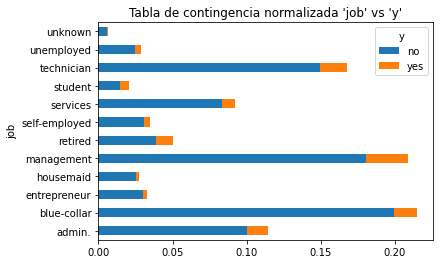

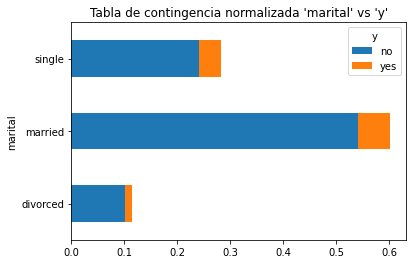

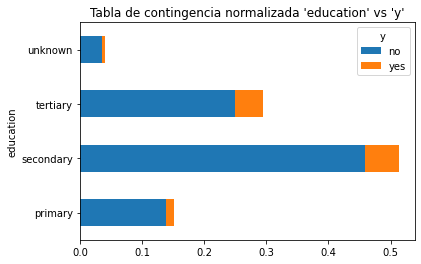

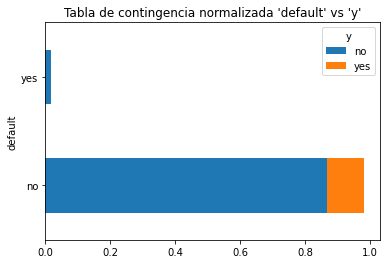

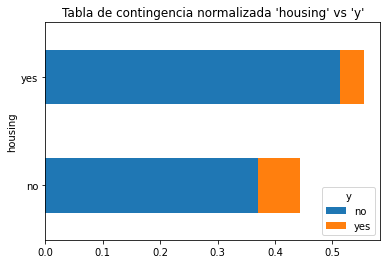

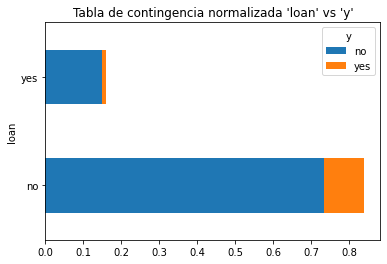

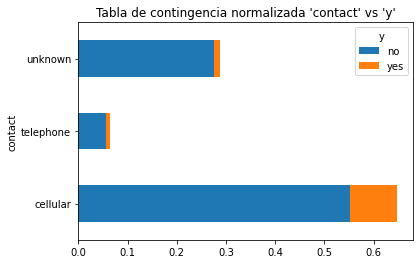

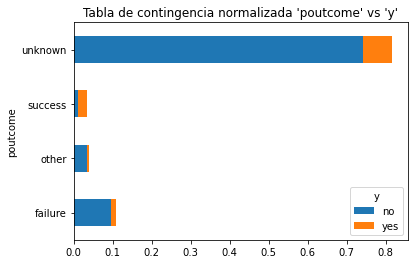

In [30]:
#Se aplica el test chi2 de las variables categóricas versus la variable de respuesta y
object_columns = banking.select_dtypes('object').drop(columns = 'y').columns
for column in object_columns:
    test_chi2(banking, column, 'y')

Según los resultados obtenidos del test chi2, se puede inferir que todas las variables categóricas son dependientes a la variable respuesta y, por tanto se pueden considerar como buenas candidatas a variables explicativas para el modelo.

### 2.1.1 Análisis de independencia con Test Kolmogorov-Smirnov

A continuación, se realiza un análisis que permite identificar si dos muestras provienen de una misma distribución o no. Lo que se busca es determinar si para una variable numérica, la muestra de personas que aceptaron la oferta (variable y = yes) y la muestra de personas que no aceptaron la oferta (variable y = no) provienen de la misma distribución. Con esto, se trata de tener indicios sobre si hay variables que logran mostrar diferenciación entre el grupo que acepta y no acepta. Este test es llamado el Kolmogorov smirnov para 2 muestras.

En esta prueba, se ponen a prueba las siguientes hipótesis:

- Hipótesis Nula H0: Las muestras provienen de la misma distribución
- Hipótesis Alternativa HA: Las muestras no provienen de la misma distribución

Para concluir sobre el resultado del test, se trabaja con una confianza del 95%. Así, si el valor-p <= 0.05, se rechaza H0.

In [31]:
def test_ks(dataset, col1):
    col_yes = dataset[dataset['y'] == 'yes'][col1]
    col_no = dataset[dataset['y'] == 'no'][col1]
    (_, pvalue) = stats.ks_2samp(col_yes, col_no)

    if pvalue <= 0.05:
        print('H0 es rechazado: para la variable \'{}\', ambas muestras no pertenecen a la misma distribución, con un valor-p de {}'.format(col1, pvalue))
    else:
        print('No se rechaza H0: para la variable \'{}\', no hay evidencia de que ambas muestras no pertenecen a la misma distribución, con un valor-p de {}'.format(col1, pvalue))

In [32]:
numeric = banking.select_dtypes(exclude='object')
for columna in numeric:
    test_ks(banking,columna)

H0 es rechazado: para la variable 'age', ambas muestras no pertenecen a la misma distribución, con un valor-p de 5.732974151389997e-29
H0 es rechazado: para la variable 'balance', ambas muestras no pertenecen a la misma distribución, con un valor-p de 2.5286680175195573e-68
H0 es rechazado: para la variable 'day', ambas muestras no pertenecen a la misma distribución, con un valor-p de 4.8366049400556046e-18
H0 es rechazado: para la variable 'month', ambas muestras no pertenecen a la misma distribución, con un valor-p de 3.460237934583386e-36
H0 es rechazado: para la variable 'duration', ambas muestras no pertenecen a la misma distribución, con un valor-p de 0.0
H0 es rechazado: para la variable 'campaign', ambas muestras no pertenecen a la misma distribución, con un valor-p de 1.0825070793232668e-48
H0 es rechazado: para la variable 'pdays', ambas muestras no pertenecen a la misma distribución, con un valor-p de 6.457723415968823e-167
H0 es rechazado: para la variable 'previous', ambas

Según los resultados obtenidos del test Kolmogorov-Smirnov, se puede inferir que ambas muestras para cada una de las variables númericas no pertenecen a la misma distribución, y por tanto se pueden considerar como buenas candidatas a variables explicativas para el modelo.

<AxesSubplot:>

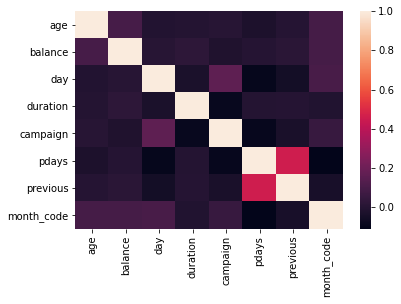

In [33]:
mat_corr = banking.corr()
sns.heatmap(mat_corr)

In [35]:
banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,month_code
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,4
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,4


In [148]:
## CODIFICACIÓN, ESCALADO DE LAS VARIABLES

In [96]:
banking_copy = banking.copy()


In [97]:
# Se aplica one-hot encoding a las variables categóricas no ordinales
banking_copy_ohe = pd.get_dummies(banking_copy, columns = ['job', 'marital', 'education', 'contact', 'poutcome'])
banking_copy_ohe

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,month_code,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,yes,10,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,0,yes,10,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,3,yes,10,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,0,no,10,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [149]:
def label_encoder(x):
    """
    Función para convertir varaibles categóricas en númericas
    """
    if x=="yes":
        return 1
    else:
        return 0

In [99]:
## convertir variablrs binarias
labels = ['default','housing','loan', 'y']
for label in labels:
    banking_copy_ohe[label] = banking_copy_ohe[label].apply(lambda x: label_encoder(x))

In [151]:
banking_copy_ohe.head(2)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,month_code,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_scaled,balance_scaled,day_scaled,duration_scaled,pdays_scaled,month_scaled,previous_scaled
0,58,0,2143,1,0,5,261,1,-1,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1.606965,0.256419,-1.298476,0.011016,-0.411453,-0.475354,-0.25194
1,44,0,29,1,0,5,151,1,-1,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0.288529,-0.437895,-1.298476,-0.416127,-0.411453,-0.475354,-0.25194


In [105]:
banking_copy_ohe.drop(['month'],axis=1,inplace=True)

In [ ]:
## escalar variables numéricas

In [156]:
scaler_age = StandardScaler().fit(banking_copy_ohe.age.values.reshape(-1, 1))
age_scaled = scaler_age.transform(banking_copy_ohe.age.values.reshape(-1, 1))

scaler_balance = StandardScaler().fit(banking_copy_ohe.balance.values.reshape(-1, 1))
balance_scaled = scaler_balance.transform(banking_copy_ohe.balance.values.reshape(-1, 1))

scaler_day = StandardScaler().fit(banking_copy_ohe.day.values.reshape(-1, 1))
day_scaled = scaler_day.transform(banking_copy_ohe.day.values.reshape(-1, 1))


scaler_duration = StandardScaler().fit(banking_copy_ohe.duration.values.reshape(-1, 1))
duration_scaled = scaler_duration.transform(banking_copy_ohe.duration.values.reshape(-1, 1))

scaler_pdays = StandardScaler().fit(banking_copy_ohe.pdays.values.reshape(-1, 1))
pdays_scaled = scaler_pdays.transform(banking_copy_ohe.pdays.values.reshape(-1, 1))

scaler_month_code = StandardScaler().fit(banking_copy_ohe.month_code.values.reshape(-1, 1))
month_scaled = scaler_month_code.transform(banking_copy_ohe.month_code.values.reshape(-1, 1))

scaler_previous = StandardScaler().fit(banking_copy_ohe.previous.values.reshape(-1, 1))
previous_scaled = scaler_previous.transform(banking_copy_ohe.previous.values.reshape(-1, 1))

scaler_campaign = StandardScaler().fit(banking_copy_ohe.campaign.values.reshape(-1, 1))
campaign_scaled = scaler_campaign.transform(banking_copy_ohe.campaign.values.reshape(-1, 1))


In [157]:
banking_copy_ohe['age_scaled'] = age_scaled
banking_copy_ohe['balance_scaled'] = balance_scaled
banking_copy_ohe['day_scaled'] = day_scaled
banking_copy_ohe['duration_scaled'] = duration_scaled
banking_copy_ohe['pdays_scaled'] = pdays_scaled
banking_copy_ohe['month_scaled'] = month_scaled
banking_copy_ohe['previous_scaled'] = previous_scaled
banking_copy_ohe['campaign_scaled'] = campaign_scaled

In [158]:
banking_copy_ohe.head(1)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,month_code,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_scaled,balance_scaled,day_scaled,duration_scaled,pdays_scaled,month_scaled,previous_scaled,campaign_scaled
0,58,0,2143,1,0,5,261,1,-1,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1.606965,0.256419,-1.298476,0.011016,-0.411453,-0.475354,-0.25194,-0.569351


In [162]:
completo = banking_copy_ohe.copy()
data_models = banking_copy_ohe[['default','housing','loan', 'y','job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown',
       'age_scaled', 'balance_scaled',
       'day_scaled', 'duration_scaled', 'pdays_scaled', 'month_scaled',
       'previous_scaled', 'campaign_scaled']].copy()

In [189]:
### CARGAR DATA DE INFERENCIA:
inferencia = pd.read_csv('Banking/test.csv',sep=";")

In [192]:
## TRANFORMAR
month_type_inf = pd.api.types.CategoricalDtype(categories = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
inferencia.month = inferencia.month.astype(month_type_inf)
inferencia['month_code'] = inferencia['month'].cat.codes
inferencia_copy = inferencia.copy() 

In [193]:
inferencia_copy_ohe = pd.get_dummies(inferencia_copy, columns = ['job', 'marital', 'education', 'contact', 'poutcome'])

In [194]:
labels = ['default','housing','loan', 'y']
for label in labels:
    inferencia_copy_ohe[label] = inferencia_copy_ohe[label].apply(lambda x: label_encoder(x))

In [195]:
#scaler_age = StandardScaler().fit(banking_copy_ohe.age.values.reshape(-1, 1))
age_scaled_inferencia = scaler_age.transform(inferencia_copy_ohe.age.values.reshape(-1, 1))

#scaler_balance = StandardScaler().fit(banking_copy_ohe.balance.values.reshape(-1, 1))
balance_scaled_inferencia = scaler_balance.transform(inferencia_copy_ohe.balance.values.reshape(-1, 1))

#scaler_day = StandardScaler().fit(banking_copy_ohe.day.values.reshape(-1, 1))
day_scaled_inferencia = scaler_day.transform(inferencia_copy_ohe.day.values.reshape(-1, 1))


#scaler_duration = StandardScaler().fit(banking_copy_ohe.duration.values.reshape(-1, 1))
duration_scaled_inferencia = scaler_duration.transform(inferencia_copy_ohe.duration.values.reshape(-1, 1))

#scaler_pdays = StandardScaler().fit(banking_copy_ohe.pdays.values.reshape(-1, 1))
pdays_scaled_inferencia = scaler_pdays.transform(inferencia_copy_ohe.pdays.values.reshape(-1, 1))

#scaler_month_code = StandardScaler().fit(banking_copy_ohe.month_code.values.reshape(-1, 1))
month_scaled_inferencia = scaler_month_code.transform(inferencia_copy_ohe.month_code.values.reshape(-1, 1))

#scaler_previous = StandardScaler().fit(banking_copy_ohe.previous.values.reshape(-1, 1))
previous_scaled_inferencia = scaler_previous.transform(inferencia_copy_ohe.previous.values.reshape(-1, 1))

#scaler_campaign = StandardScaler().fit(banking_copy_ohe.campaign.values.reshape(-1, 1))
campaign_scaled_inferencia = scaler_campaign.transform(inferencia_copy_ohe.campaign.values.reshape(-1, 1))

In [196]:
inferencia_copy_ohe['age_scaled'] = age_scaled_inferencia
inferencia_copy_ohe['balance_scaled'] = balance_scaled_inferencia
inferencia_copy_ohe['day_scaled'] = day_scaled_inferencia
inferencia_copy_ohe['duration_scaled'] = duration_scaled_inferencia
inferencia_copy_ohe['pdays_scaled'] = pdays_scaled_inferencia
inferencia_copy_ohe['month_scaled'] = month_scaled_inferencia
inferencia_copy_ohe['previous_scaled'] = previous_scaled_inferencia
inferencia_copy_ohe['campaign_scaled'] = campaign_scaled_inferencia

In [198]:
inferencia_copy_ohe.head(2)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,month_code,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_scaled,balance_scaled,day_scaled,duration_scaled,pdays_scaled,month_scaled,previous_scaled,campaign_scaled
0,30,0,1787,0,0,19,oct,79,1,-1,0,0,9,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,-1.029906,0.139496,0.383734,-0.695712,-0.411453,1.601052,-0.251940,-0.569351
1,33,0,4789,1,1,11,may,220,1,339,4,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,-0.747384,1.125461,-0.577529,-0.148192,2.984213,-0.475354,1.484611,-0.569351


In [199]:
completo_inferencia = inferencia_copy_ohe.copy()
inferencia_models = inferencia_copy_ohe[['default','housing','loan', 'y','job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown',
       'age_scaled', 'balance_scaled',
       'day_scaled', 'duration_scaled', 'pdays_scaled', 'month_scaled',
       'previous_scaled', 'campaign_scaled']].copy()

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [211]:
from sklearn import metrics

def mostrar_metricas(y_test, y_pred):
    
    #Calculamos y mostramos el accuracy
    acc = metrics.accuracy_score(y_test, y_pred)
    print ("Exactitud del clasificador: %.2f " %(acc*100.0))
    
    #Calculamos y mostramos el F1-score
    f1 = metrics.f1_score(y_test, y_pred)
    print ("F1-Score del clasificador: %.2f " %(f1*100.0))

    #Calculamos y mostramos el Recall
    recall = metrics.recall_score(y_test, y_pred)
    print ("Recall del clasificador: %.2f " %(recall*100.0))
    
    #Calculamos la matriz de confusión
    mat = metrics.confusion_matrix(y_test, y_pred)
    
    #Mostramos la matriz de confusión
    plt.figure(figsize=(2,2))
    sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")    
    plt.show()

In [169]:
X_train, X_test, y_train, y_test = train_test_split( data_models.drop('y',axis=1), data_models[['y']], test_size=0.10, random_state=422)

In [170]:
y_train.y.value_counts()

0    35924
1     4765
Name: y, dtype: int64

In [171]:
y_test.y.value_counts()

0    3998
1     524
Name: y, dtype: int64

In [176]:
lr = LogisticRegression(random_state=422).fit(X_train, y_train)

C:\Users\Santiago.gonzalez\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Santiago.gonzalez\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test) 

Exactitud del clasificador: 90.03 
F1-Score del clasificador: 43.11 
Recall del clasificador: 32.26 


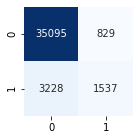

In [232]:
## MÉTRICAS EN TRAIN:
mostrar_metricas(y_train,y_train_pred)

Exactitud del clasificador: 89.94 
F1-Score del clasificador: 43.05 
Recall del clasificador: 32.82 


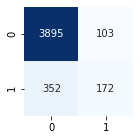

In [233]:
## MÉTRICAS EN TEST:
mostrar_metricas(y_test,y_test_pred,)

In [217]:
### INFERENCIA:
y_inf = lr.predict(inferencia_models.drop('y',axis=1))


Exactitud del clasificador: 90.00 
F1-Score del clasificador: 40.53 
Recall del clasificador: 29.56 


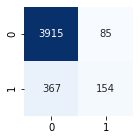

In [234]:
mostrar_metricas(inferencia_models.y,y_inf,)

import pickle
filename = 'lr_model_goosdsd.sav'
pickle.dump(lr, open(filename, 'wb'))



Entrenando el clasificador:  LDA
Exactitud del clasificador: 90.03 
F1-Score del clasificador: 47.74 
Recall del clasificador: 39.31 


C:\Users\Santiago.gonzalez\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


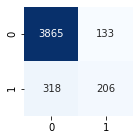



Entrenando el clasificador:  KNN


C:\Users\Santiago.gonzalez\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Exactitud del clasificador: 89.98 
F1-Score del clasificador: 45.49 
Recall del clasificador: 36.07 


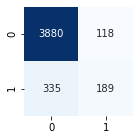



Entrenando el clasificador:  Decision Tree
Exactitud del clasificador: 88.26 
F1-Score del clasificador: 48.89 
Recall del clasificador: 48.47 


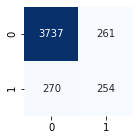



Entrenando el clasificador:  LOGISTIC REGRESSOR


C:\Users\Santiago.gonzalez\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Exactitud del clasificador: 89.94 
F1-Score del clasificador: 43.05 
Recall del clasificador: 32.82 


C:\Users\Santiago.gonzalez\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


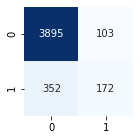

C:\Users\Santiago.gonzalez\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)




Entrenando el clasificador:  XGNBOOST
Exactitud del clasificador: 90.62 
F1-Score del clasificador: 50.35 
Recall del clasificador: 41.03 


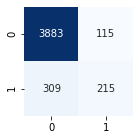

In [237]:
from sklearn import tree
from sklearn import neighbors  
from sklearn import discriminant_analysis
from sklearn.ensemble import GradientBoostingClassifier
#Definimos algunos clasificadores tradicionales para analizar su desempeño
clfs = []
clfs.append(('LDA', discriminant_analysis.LinearDiscriminantAnalysis()))
clfs.append(('KNN', neighbors.KNeighborsClassifier(n_neighbors=5)))
clfs.append(('Decision Tree', tree.DecisionTreeClassifier()))
clfs.append(('LOGISTIC REGRESSOR', LogisticRegression()))
clfs.append(('XGNBOOST', GradientBoostingClassifier()))

for name, model in clfs:
    
    print("\n\nEntrenando el clasificador: ", name)
    
    #Entrenamos el modelo
    model.fit(X_train, y_train)
    
    #Evaluamos el modelo
    y_pred = model.predict(X_test)
    
    #Mostramos las métricas del clasificador
    mostrar_metricas(y_test, y_pred)

In [ ]:
#TAREA
#1. Aplicar Label Encoder a las variables con 'yes' y 'no'
#2. Aplicar Label Encoder al colegio, donde unknown = 0
#2. Aplicar One Hot Encoder a las demás

In [243]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca.fit(data_models.drop('y',axis=1))

PCA(n_components=0.99)

In [244]:
pca.transform(data_models.drop('y',axis=1)).shape

(45211, 27)

# Presentación de resultados

# Análisis y conclusiones